In [1]:

from sentinelhub import SHConfig


INSTANCE_ID = 'a46cbcce-eab2-418e-8067-cb293dc69e56'

if INSTANCE_ID:
    config = SHConfig()
    config.instance_id = INSTANCE_ID
else:
    config = None

In [2]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
import datetime
import numpy as np

import matplotlib.pyplot as plt

In [4]:
from sentinelhub import WmsRequest, WcsRequest, MimeType, CRS, BBox

In [34]:
def plot_image(image, factor=1):
    """
    Utility function for plotting RGB images.
    """
    fig = plt.subplots(nrows=1, ncols=1, figsize=(15, 7))

    if np.issubdtype(image.dtype, np.floating):
        plt.imshow(np.minimum(image * factor, 1))
    else:
        plt.imshow(image)

In [7]:
spaceag_coords_wgs84 = [-75.653648,-14.216077,-75.634345,-14.190610]

In [8]:
spaceag_bbox = BBox(bbox=spaceag_coords_wgs84, crs=CRS.WGS84)

In [46]:
wms_true_color_request = WmsRequest(
    layer='NDVI',
    bbox=spaceag_bbox,
    time='2020-04-20',
    width=512,
    height=856,
    config=config
)

In [47]:
wms_true_color_img = wms_true_color_request.get_data()

In [48]:
print('Returned data is of type = %s and length %d.' % (type(wms_true_color_img), len(wms_true_color_img)))

Returned data is of type = <class 'list'> and length 1.


In [49]:
print('Single element in the list is of type {} and has shape {}'.format(type(wms_true_color_img[-1]),
                                                                         wms_true_color_img[-1].shape))

Single element in the list is of type <class 'numpy.ndarray'> and has shape (856, 512, 3)


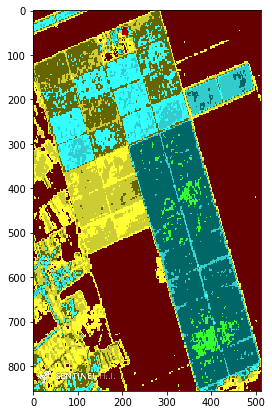

In [50]:
plot_image(wms_true_color_img[-1])

In [5]:
### Cargar tramo de fechas
%run -i 'Diccionarios.py'
len(ventana_fechas)

2

In [109]:
diccionario_fechas[0]

'2016-07-15 15:23:58'

In [110]:
diccionario_fechas[88]

'2020-04-20 15:26:52'

In [111]:
type(diccionario_fechas)

tuple

In [119]:
wms_true_color_request = WmsRequest(
    data_folder = 'test_images',
    layer='NDVI_2016-07-15',
    bbox=spaceag_bbox,
    time=ventana_fechas,
    width=512,
    height=856,
    image_format = MimeType.TIFF_d32f,
    config=config
)

In [124]:
%%time
wms_true_color_img = wms_true_color_request.get_data(redownload=True,save_data=True)

CPU times: user 12.5 s, sys: 1.26 s, total: 13.7 s
Wall time: 30.4 s


In [121]:
print('Hay %d Sentinel-2 imagenes disponibles en el intervalo.' % len(wms_true_color_img))

Hay 204 Sentinel-2 imagenes disponibles en el intervalo.


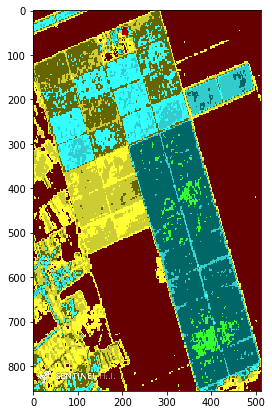

In [122]:
plot_image(wms_true_color_img[203])

In [123]:
print('These %d images were taken on the following dates:' % len(wms_true_color_img))
for index, date in enumerate(wms_true_color_request.get_dates()):
    print(' - image %d was taken on %s' % (index, date))

These 204 images were taken on the following dates:
 - image 0 was taken on 2016-07-15 15:23:58
 - image 1 was taken on 2016-08-04 15:17:08
 - image 2 was taken on 2016-08-24 15:17:05
 - image 3 was taken on 2016-09-13 15:26:48
 - image 4 was taken on 2016-10-03 15:23:47
 - image 5 was taken on 2016-10-23 15:22:21
 - image 6 was taken on 2016-11-12 15:21:33
 - image 7 was taken on 2016-11-22 15:19:30
 - image 8 was taken on 2016-12-02 15:21:03
 - image 9 was taken on 2016-12-22 15:23:53
 - image 10 was taken on 2017-01-01 15:18:50
 - image 11 was taken on 2017-01-11 15:20:24
 - image 12 was taken on 2017-01-31 15:25:08
 - image 13 was taken on 2017-02-10 15:25:12
 - image 14 was taken on 2017-02-20 15:19:29
 - image 15 was taken on 2017-03-12 15:17:06
 - image 16 was taken on 2017-04-01 15:22:07
 - image 17 was taken on 2017-05-11 15:19:52
 - image 18 was taken on 2017-05-31 15:19:52
 - image 19 was taken on 2017-06-20 15:18:58
 - image 20 was taken on 2017-07-10 15:19:39
 - image 21 w

In [106]:
%%time
wms_true_color_img = wms_true_color_request.get_data(save_data=True)

CPU times: user 12 s, sys: 1.12 s, total: 13.1 s
Wall time: 51.1 s


In [9]:
### Nuevo indice volver a descargar en otro folder
wms_true_color_request = WmsRequest(
    data_folder = 'images_ndvi',
    layer='NDVI_2016-07-15',
    bbox=spaceag_bbox,
    time=ventana_fechas,
    width=512,
    height=856,
    image_format = MimeType.TIFF_d32f,
    config=config
)

In [10]:
%%time
wms_true_color_img = wms_true_color_request.get_data(redownload=True,save_data=True)

CPU times: user 16.5 s, sys: 1.92 s, total: 18.4 s
Wall time: 1min 6s
